# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muh. Zulkipli Noor Hermawan]
- **Email:** [muhzulkiplinoorhermawan@gmail.com & mc013d5y0422@student.devacademy.id]
- **ID Dicoding:** [muhzulkiplinoor20]

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
2. Bagaimana pola penyewaan sepeda berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [13]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive/MC03 Proyek Analisis Data Python/"

day_df = pd.read_csv("/content/drive/My Drive/MC03 Proyek Analisis Data Python/data/day.csv")
hour_df = pd.read_csv("/content/drive/My Drive/MC03 Proyek Analisis Data Python/data/hour.csv")

day_df.head()
hour_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 dasboard   data  'Proyek Analisis Data Python.ipynb'   Readme.txt


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset memiliki informasi terkait penyewaan sepeda, cuaca, musim, suhu, kelembaban, dan kecepatan angin.
- Data tersedia dalam dua bentuk: agregasi harian (day.csv) dan agregasi per jam (hour.csv).

### Assessing Data

In [14]:
day_df.info()
hour_df.info()

day_df.isnull().sum()
hour_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Tidak ada nilai yang hilang dalam dataset.
- Beberapa kolom perlu diperjelas interpretasinya, misalnya kode numerik untuk musim dan cuaca.

### Cleaning Data

In [15]:
from google.colab import drive
import os
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load cleaned datasets
day_df = pd.read_csv("/content/drive/My Drive/MC03 Proyek Analisis Data Python/data/day.csv")
hour_df = pd.read_csv("/content/drive/My Drive/MC03 Proyek Analisis Data Python/data/hour.csv")

# Convert date column to datetime format
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Drop unnecessary columns
day_df.drop(columns=['instant'], inplace=True)
hour_df.drop(columns=['instant'], inplace=True)

# Merge datasets on 'dteday' column
main_data = pd.merge(hour_df, day_df, on='dteday', suffixes=('_hour', '_day'))

# Define output path
output_dir = "/content/drive/My Drive/MC03 Proyek Analisis Data Python/dashboard"
output_path = os.path.join(output_dir, "main_data.csv")

# Create directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the merged dataset to Google Drive
main_data.to_csv(output_path, index=False)

print(f"File berhasil disimpan di: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File berhasil disimpan di: /content/drive/My Drive/MC03 Proyek Analisis Data Python/dashboard/main_data.csv


**Insight:**
- Format tanggal dikonversi ke datetime untuk analisis lebih lanjut.
- Kolom "instant" dihapus karena tidak memberikan informasi analitis yang berarti.

## Exploratory Data Analysis (EDA)

### Explore ...

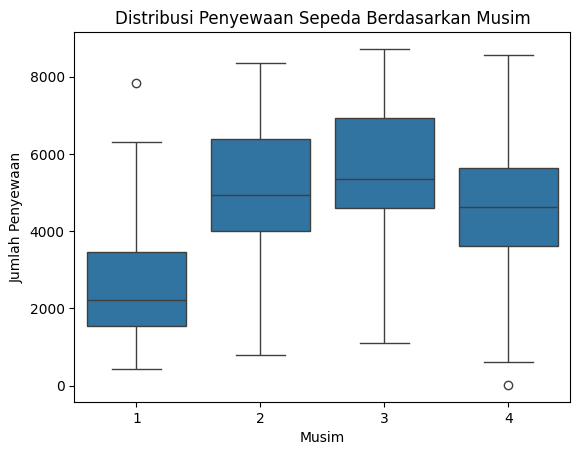

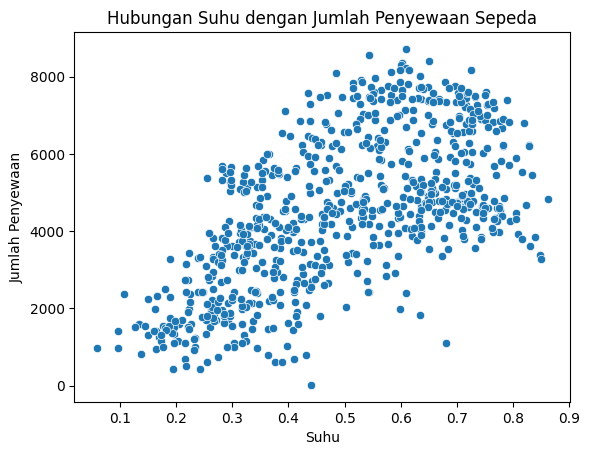

In [16]:
### Explore Pengaruh Musim terhadap Penyewaan Sepeda
sns.boxplot(x='season', y='cnt', data=day_df)
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.show()

### Explore Hubungan Suhu dengan Penyewaan
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan")
plt.title("Hubungan Suhu dengan Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Penyewaan sepeda tertinggi terjadi pada musim panas dan gugur, sementara musim semi memiliki jumlah penyewaan lebih rendah.
- Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda, di mana suhu yang lebih tinggi cenderung meningkatkan penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

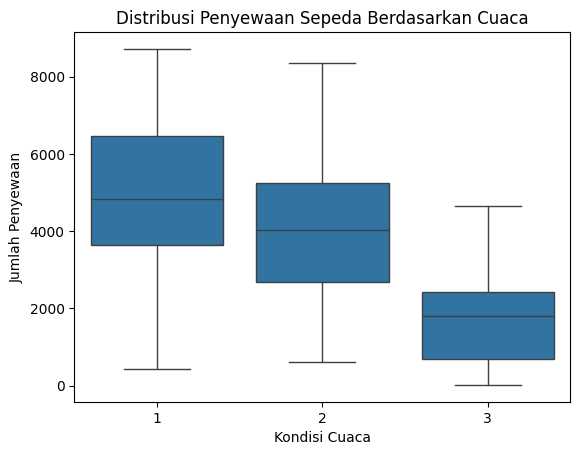

In [17]:
### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Cuaca")
plt.show()

### Pertanyaan 2:

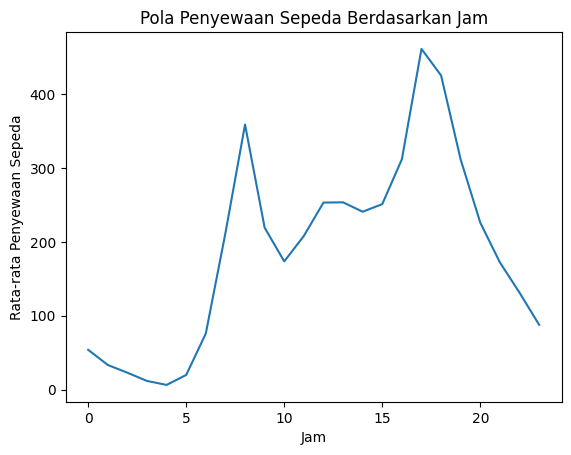

In [18]:
### Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan jam dalam sehari?

sns.lineplot(x='hr', y='cnt', data=hour_df.groupby('hr').mean().reset_index())
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda Berdasarkan Jam")
plt.show()

**Insight:**
- Cuaca yang lebih buruk (kategori 3 dan 4) cenderung memiliki jumlah penyewaan lebih rendah.
- Pola menunjukkan adanya lonjakan penyewaan pada jam sibuk (pagi dan sore), kemungkinan terkait perjalanan kerja.

## Analisis Lanjutan (Opsional)

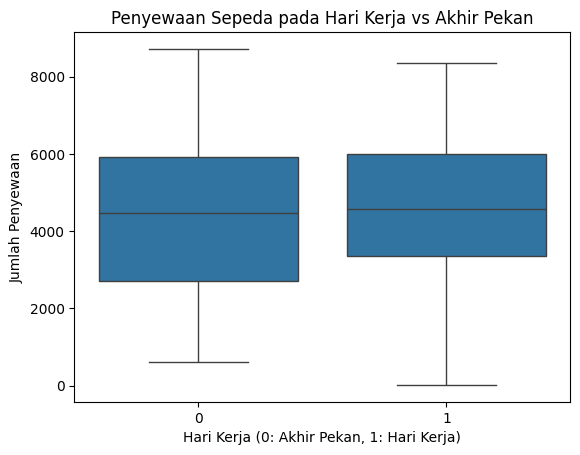

In [19]:
### Pengaruh Hari Kerja vs Akhir Pekan terhadap Penyewaan
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.xlabel("Hari Kerja (0: Akhir Pekan, 1: Hari Kerja)")
plt.ylabel("Jumlah Penyewaan")
plt.title("Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan")
plt.show()

**Insight:**
- Jumlah penyewaan lebih tinggi pada hari kerja dibandingkan akhir pekan.
- Kemungkinan besar karena banyak orang menggunakan sepeda sebagai alat transportasi untuk bekerja.

## Conclusion

- Cuaca yang lebih baik cenderung meningkatkan jumlah penyewaan sepeda.
- Pola penyewaan sepeda menunjukkan puncak pada jam kerja pagi dan sore hari.
- Penyewaan lebih tinggi saat musim panas dan gugur dibandingkan musim semi.
- Hari kerja memiliki lebih banyak penyewaan dibandingkan akhir pekan.

## Membuat Dashboard Streamlit

In [20]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [22]:
print(df.columns)

Index(['dteday', 'season_hour', 'yr_hour', 'mnth_hour', 'hr', 'holiday_hour',
       'weekday_hour', 'workingday_hour', 'weathersit_hour', 'temp_hour',
       'atemp_hour', 'hum_hour', 'windspeed_hour', 'casual_hour',
       'registered_hour', 'cnt_hour', 'season_day', 'yr_day', 'mnth_day',
       'holiday_day', 'weekday_day', 'workingday_day', 'weathersit_day',
       'temp_day', 'atemp_day', 'hum_day', 'windspeed_day', 'casual_day',
       'registered_day', 'cnt_day'],
      dtype='object')


In [24]:
print(df.dtypes)

dteday              object
season_hour          int64
yr_hour              int64
mnth_hour            int64
hr                   int64
holiday_hour         int64
weekday_hour         int64
workingday_hour      int64
weathersit_hour      int64
temp_hour          float64
atemp_hour         float64
hum_hour           float64
windspeed_hour     float64
casual_hour          int64
registered_hour      int64
cnt_hour             int64
season_day           int64
yr_day               int64
mnth_day             int64
holiday_day          int64
weekday_day          int64
workingday_day       int64
weathersit_day       int64
temp_day           float64
atemp_day          float64
hum_day            float64
windspeed_day      float64
casual_day           int64
registered_day       int64
cnt_day              int64
dtype: object


In [25]:
df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')

In [26]:
sns.lineplot(x='hr', y='cnt_hour', data=df.groupby('hr').mean().reset_index())

<Axes: xlabel='hr', ylabel='cnt_hour'>

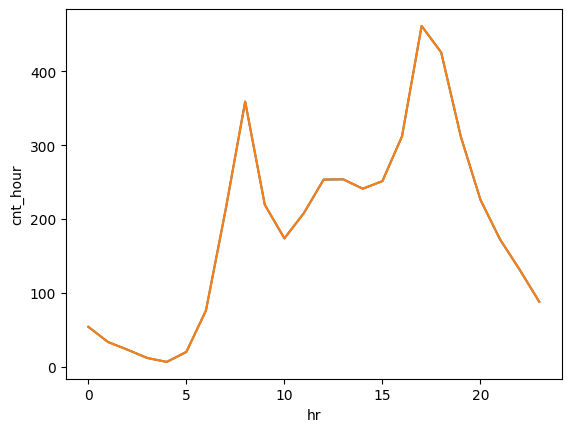

In [27]:
import matplotlib.pyplot as plt
sns.lineplot(x='hr', y='cnt_hour', data=df.groupby('hr').mean().reset_index())
plt.show()

In [29]:
print(df.columns)

Index(['dteday', 'season_hour', 'yr_hour', 'mnth_hour', 'hr', 'holiday_hour',
       'weekday_hour', 'workingday_hour', 'weathersit_hour', 'temp_hour',
       'atemp_hour', 'hum_hour', 'windspeed_hour', 'casual_hour',
       'registered_hour', 'cnt_hour', 'season_day', 'yr_day', 'mnth_day',
       'holiday_day', 'weekday_day', 'workingday_day', 'weathersit_day',
       'temp_day', 'atemp_day', 'hum_day', 'windspeed_day', 'casual_day',
       'registered_day', 'cnt_day'],
      dtype='object')


In [30]:
print(df.head())

       dteday  season_hour  yr_hour  mnth_hour  hr  holiday_hour  \
0  2011-01-01            1        0          1   0             0   
1  2011-01-01            1        0          1   1             0   
2  2011-01-01            1        0          1   2             0   
3  2011-01-01            1        0          1   3             0   
4  2011-01-01            1        0          1   4             0   

   weekday_hour  workingday_hour  weathersit_hour  temp_hour  ...  \
0             6                0                1       0.24  ...   
1             6                0                1       0.22  ...   
2             6                0                1       0.22  ...   
3             6                0                1       0.24  ...   
4             6                0                1       0.24  ...   

   weekday_day  workingday_day  weathersit_day  temp_day  atemp_day   hum_day  \
0            6               0               2  0.344167   0.363625  0.805833   
1            6

In [32]:
print(df.dtypes)

dteday              object
season_hour          int64
yr_hour              int64
mnth_hour            int64
hr                   int64
holiday_hour         int64
weekday_hour         int64
workingday_hour      int64
weathersit_hour      int64
temp_hour          float64
atemp_hour         float64
hum_hour           float64
windspeed_hour     float64
casual_hour          int64
registered_hour      int64
cnt_hour             int64
season_day           int64
yr_day               int64
mnth_day             int64
holiday_day          int64
weekday_day          int64
workingday_day       int64
weathersit_day       int64
temp_day           float64
atemp_day          float64
hum_day            float64
windspeed_day      float64
casual_day           int64
registered_day       int64
cnt_day              int64
dtype: object


In [33]:
df_grouped = df.select_dtypes(include=['number']).groupby('hr').mean().reset_index()
sns.lineplot(x='hr', y='cnt_hour', data=df_grouped)

<Axes: xlabel='hr', ylabel='cnt_hour'>

In [34]:
df_grouped = df.drop(columns=['dteday']).groupby('hr').mean().reset_index()
sns.lineplot(x='hr', y='cnt_hour', data=df_grouped)

<Axes: xlabel='hr', ylabel='cnt_hour'>

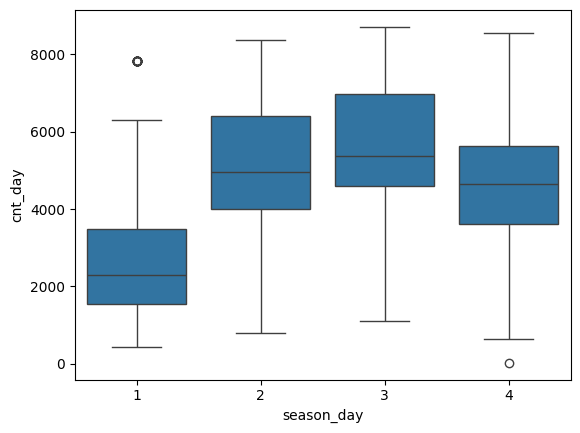

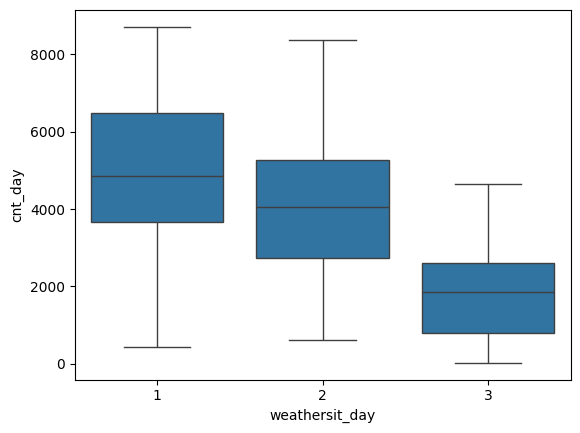

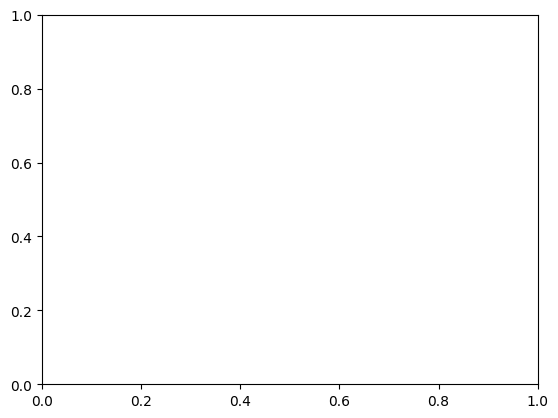

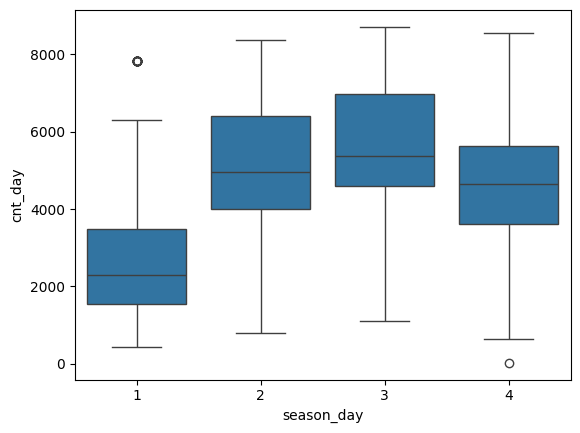

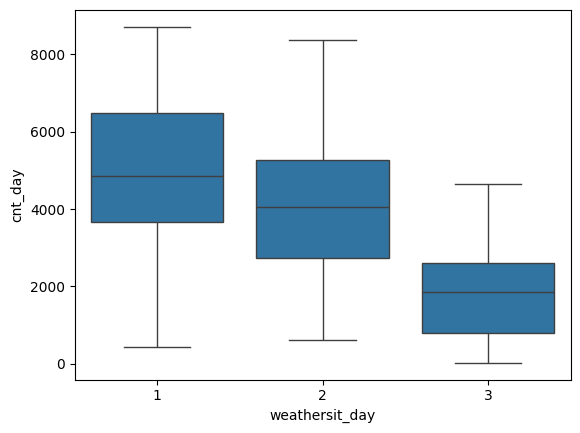

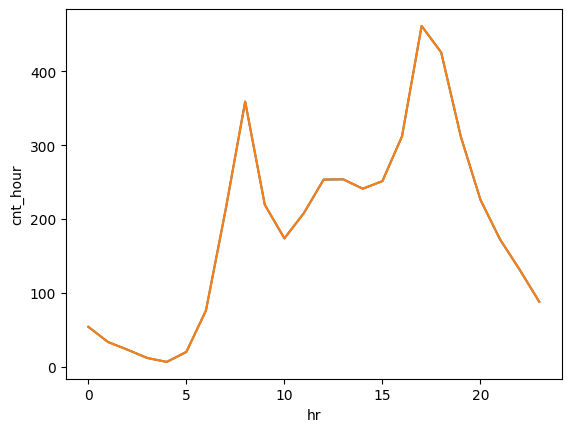

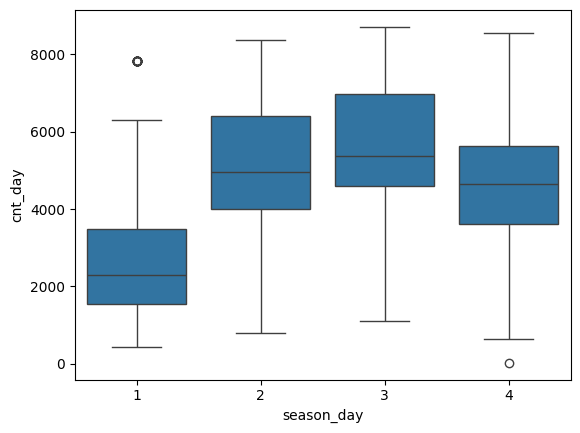

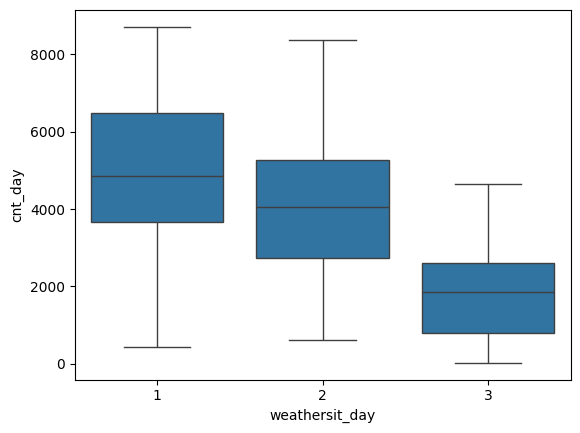

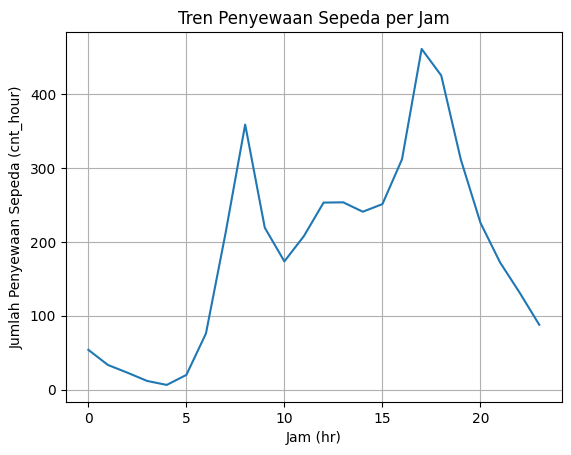

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

df_grouped = df.select_dtypes(include=['number']).groupby('hr').mean().reset_index()

sns.lineplot(x='hr', y='cnt_hour', data=df_grouped)

plt.xlabel("Jam (hr)")
plt.ylabel("Jumlah Penyewaan Sepeda (cnt_hour)")
plt.title("Tren Penyewaan Sepeda per Jam")
plt.grid(True)

plt.show()

In [43]:
with open("/content/drive/My Drive/MC03 Proyek Analisis Data Python/dashboard/dashboard.py", "w") as f:
    f.write("""
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from Google Drive
DATA_PATH = "/content/drive/My Drive/MC03 Proyek Analisis Data Python/dashboard/main_data.csv"

@st.cache_data
def load_data():
    return pd.read_csv(DATA_PATH)

# Load data
df = load_data()

# Streamlit App
st.title("📊 Bike Sharing Dashboard")
st.sidebar.header("Filter Data")

# Sidebar filters
season = st.sidebar.selectbox("Pilih Musim:", df['season_day'].unique())
weather = st.sidebar.selectbox("Pilih Kondisi Cuaca:", df['weathersit_day'].unique())

df_filtered = df[(df['season_day'] == season) & (df['weathersit_day'] == weather)]

st.write("### Statistik Data")
st.write(df_filtered.describe())

# Visualization 1: Penyewaan Berdasarkan Musim
st.write("### Penyewaan Sepeda Berdasarkan Musim")
fig, ax = plt.subplots()
sns.boxplot(x='season_day', y='cnt_day', data=df, ax=ax)
st.pyplot(fig)

# Visualization 2: Penyewaan Berdasarkan Cuaca
st.write("### Penyewaan Sepeda Berdasarkan Cuaca")
fig, ax = plt.subplots()
sns.boxplot(x='weathersit_day', y='cnt_day', data=df, ax=ax)
st.pyplot(fig)

# Visualization 3: Penyewaan per Jam
st.write("### Pola Penyewaan Sepeda Berdasarkan Jam")
df['hr'] = pd.to_numeric(df['hr'], errors='coerce')  # Pastikan 'hr' numerik
df_grouped = df.groupby('hr').mean(numeric_only=True).reset_index()  # Gunakan numeric_only=True

fig, ax = plt.subplots()
sns.lineplot(x='hr', y='cnt_hour', data=df_grouped, ax=ax)
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
st.pyplot(fig)
""")

In [44]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# Load dataset from Google Drive
DATA_PATH = "/content/drive/My Drive/MC03 Proyek Analisis Data Python/dashboard/main_data.csv"

@st.cache_data
def load_data():
    return pd.read_csv(DATA_PATH)

# Load data
df = load_data()

# Streamlit App
st.title("📊 Bike Sharing Dashboard")
st.sidebar.header("Filter Data")

# Sidebar filters
season = st.sidebar.selectbox("Pilih Musim:", df['season_day'].unique())
weather = st.sidebar.selectbox("Pilih Kondisi Cuaca:", df['weathersit_day'].unique())

df_filtered = df[(df['season_day'] == season) & (df['weathersit_day'] == weather)]

st.write("### Statistik Data")
st.write(df_filtered.describe())

# Visualization 1: Penyewaan Berdasarkan Musim
st.write("### Penyewaan Sepeda Berdasarkan Musim")
fig, ax = plt.subplots()
sns.boxplot(x='season_day', y='cnt_day', data=df, ax=ax)
st.pyplot(fig)

# Visualization 2: Penyewaan Berdasarkan Cuaca
st.write("### Penyewaan Sepeda Berdasarkan Cuaca")
fig, ax = plt.subplots()
sns.boxplot(x='weathersit_day', y='cnt_day', data=df, ax=ax)
st.pyplot(fig)

# Visualization 3: Penyewaan per Jam
st.write("### Pola Penyewaan Sepeda Berdasarkan Jam")
df['hr'] = pd.to_numeric(df['hr'], errors='coerce')  # Pastikan 'hr' numerik
df_grouped = df.groupby('hr').mean(numeric_only=True).reset_index()  # Gunakan numeric_only=True

fig, ax = plt.subplots()
sns.lineplot(x='hr', y='cnt_hour', data=df_grouped, ax=ax)
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
st.pyplot(fig)

st.write("### Kesimpulan")
st.markdown("- Cuaca dan musim mempengaruhi jumlah penyewaan sepeda.")
st.markdown("- Penyewaan meningkat saat cuaca baik dan musim panas/gugur.")
st.markdown("- Jam sibuk pagi dan sore memiliki lonjakan penyewaan.")

2025-03-17 05:56:12.189 No runtime found, using MemoryCacheStorageManager
2025-03-17 05:56:12.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.197 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.199 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.201 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.201 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.204 Thread 'MainThread':

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2025-03-17 05:56:12.522 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.524 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.526 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.534 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.650 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 05:56:12.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [46]:
!ls

drive  sample_data


In [47]:
!ls "/content/drive/My Drive/MC03 Proyek Analisis Data Python/dashboard"

dashboard.py  main_data.csv


In [48]:
!streamlit run "/content/drive/My Drive/MC03 Proyek Analisis Data Python/dashboard/dashboard.py" & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.134.146.23:8501

  Stopping...
^C


In [49]:
!cp "/content/drive/My Drive/MC03 Proyek Analisis Data Python/dashboard/dashboard.py" /content/

In [50]:
!streamlit run /content/dashboard.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.134.146.23:8501

⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://tired-geckos-hope.loca.lt
  Stopping...
^C


In [55]:
from google.colab import drive
drive.mount('/content/drive')

import os
project_dir = '/content/drive/My Drive/MC03 Proyek Analisis Data Python'
os.makedirs(project_dir, exist_ok=True)

requirements_content = """
matplotlib==3.10.0
numpy==1.26.4
pandas==2.2.2
seaborn==0.13.2
streamlit==1.43.2
"""
requirements_path = os.path.join(project_dir, 'requirements.txt')
with open(requirements_path, 'w') as f:
    f.write(requirements_content.strip())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
!pip install -r "/content/drive/My Drive/MC03 Proyek Analisis Data Python/requirements.txt"

In [57]:
import pkg_resources

with open("/content/drive/My Drive/MC03 Proyek Analisis Data Python/requirements.txt", "r") as f:
    required_packages = f.read().splitlines()

installed_packages = {pkg.key: pkg.version for pkg in pkg_resources.working_set}

for package in required_packages:
    pkg_name = package.split("==")[0]  # Ambil nama paket saja
    if pkg_name in installed_packages:
        print(f"{pkg_name} ✅ Terinstal (Versi: {installed_packages[pkg_name]})")
    else:
        print(f"{pkg_name} ❌ Tidak Terinstal")

matplotlib ✅ Terinstal (Versi: 3.10.0)
numpy ✅ Terinstal (Versi: 1.26.4)
pandas ✅ Terinstal (Versi: 2.2.2)
seaborn ✅ Terinstal (Versi: 0.13.2)
streamlit ✅ Terinstal (Versi: 1.43.2)


<ipython-input-57-05b005f43bdb>:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [58]:
import pkg_resources

with open("/content/drive/My Drive/MC03 Proyek Analisis Data Python/requirements.txt", "w") as f:
    for pkg in pkg_resources.working_set:
        f.write(f"{pkg.key}=={pkg.version}\n")

print("✅ `requirements.txt` berhasil diperbarui dengan versi terbaru!")

✅ `requirements.txt` berhasil diperbarui dengan versi terbaru!


In [59]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Tentukan path folder di Google Drive
project_folder = "/content/drive/My Drive/MC03 Proyek Analisis Data Python"
readme_path = os.path.join(project_folder, "README.md")

# Isi README.md
readme_content = """# Bike Sharing Dashboard

## Deskripsi
Proyek ini adalah dashboard interaktif untuk menganalisis data penyewaan sepeda menggunakan Streamlit.

## Struktur Folder
- `dashboard.py` : Script utama untuk menjalankan dashboard.
- `requirements.txt` : Daftar dependensi yang diperlukan.
- `README.md` : Dokumentasi proyek ini.
- `data/` : Folder tempat menyimpan dataset.

## Cara Menjalankan
1. Pastikan semua dependensi telah diinstal:
   ```sh
   pip install -r requirements.txt
   ```
2. Jalankan aplikasi dengan perintah:
   ```sh
   streamlit run dashboard.py
   ```

## Fitur
- Filter data berdasarkan musim dan kondisi cuaca.
- Visualisasi penyewaan sepeda berdasarkan musim dan cuaca.
- Analisis pola penyewaan berdasarkan jam.

## Teknologi yang Digunakan
- Python
- Streamlit
- Pandas
- Matplotlib
- Seaborn
"""

# Simpan README.md
with open(readme_path, "w") as f:
    f.write(readme_content)

print(f"README.md berhasil disimpan di {readme_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
README.md berhasil disimpan di /content/drive/My Drive/MC03 Proyek Analisis Data Python/README.md


In [62]:
from google.colab import drive
drive.mount('/content/drive')

!cd "/content/drive/My Drive/MC03 Proyek Analisis Data Python" && git init

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/My Drive/MC03 Proyek Analisis Data Python/.git/


In [ ]:
!cd "/content/drive/My Drive/MC03 Proyek Analisis Data Python" && git remote add origin https://github.com/muhzulkiplinoorh20/submission-analisis-data-python.git
